# Support Vector Machines

_We bring in a SVM model (kernel agnostic) drawing utility in here, inspired by Meng-Fen Chiang's incredible work [here](https://github.com/ankechiang/Teaching/blob/main/CS361/week9_hard-and-soft-margin-svms.ipynb) but greatly trimmed down and simplified._

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_svc_decision_function(model, features, labels):
    plt.scatter(features[labels == -1, 0],
            features[labels == -1, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='class 1')
    plt.scatter(features[labels == 1, 0],
            features[labels == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='class 2')
    
    plt.legend(scatterpoints=1)
    plt.tight_layout()

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    colors = ('lightblue', 'orange', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:2])
    x1_min, x1_max = xlim[0] - 1, xlim[1] + 1
    x2_min, x2_max = ylim[0] - 1, ylim[1] + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)    
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Q1.1 - 1.4

Recall $C$ references [the parameter in](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn-svm-linearsvc) `sklearn's` linear support vector machine implementation. We understand that $C$ drives the idea of a spectrum between a hard margin and a soft margin SVM by associating cost to misclassifcation.

We carry out a leave-1-out cross-validation with an SVM, we show that SVM with  𝐶=1 can be improved by setting  𝐶=0.01. Reported is the train and test performance, we choose accuracy as the precise measure.

_Note: I've come across ipywidgets, interaction is nessecary in order to see all plots here._

In [2]:
from sklearn.svm import SVC
import pandas as pd
from ipywidgets import interact
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

created_features, created_labels = make_blobs(n_samples=100, centers=2,
                      random_state=0, cluster_std=1.1)
created_labels = np.where(created_labels==0, -1, 1)

def evaluatePerformance(model, created_features, created_labels):
    train_scores, test_scores = [], []

    for train_index, test_index in LeaveOneOut().split(created_features):
        training_created_features, testing_created_features = created_features[train_index], created_features[test_index]
        training_created_labels, testing_created_labels = created_labels[train_index], created_labels[test_index]

        model.fit(training_created_features, training_created_labels)

        training_created_labels_pred = model.predict(training_created_features)
        train_score = accuracy_score(training_created_labels, training_created_labels_pred)
        train_scores.append(train_score)

        testing_created_labels_pred = model.predict(testing_created_features)
        test_score = accuracy_score(testing_created_labels, testing_created_labels_pred)
        test_scores.append(test_score)
    
    return np.mean(train_scores), np.mean(test_scores)

def interactivePlottingOfSVM(C):
    model = SVC(kernel='linear', C=C).fit(created_features, created_labels)
    train_score, test_score = evaluatePerformance(model, created_features, created_labels)    
    
    print("Mean training accuracy: {:.2f}".format(train_score))
    print("Mean test accuracy: {:.2f}".format(test_score))
    plot_svc_decision_function(model, created_features, created_labels)

interact(interactivePlottingOfSVM, C=[0.1, 1000]);

# writing the generated dataset here
reshaped_created_labels = np.reshape(created_labels, (100, 1))
data = np.hstack((created_features, reshaped_created_labels))

# Write the array to a .csv file
df = pd.DataFrame(data)
df.to_csv("datasets/D1.csv", index=False, header=False)

interactive(children=(Dropdown(description='C', options=(0.1, 1000), value=0.1), Output()), _dom_classes=('wid…

# Q1.5

We've designed a dataset with a 100 points for which the selection of $C$ in a linear SVM makes a difference. To dramatise the impact of $C$ we choose a dataset that has some overlap, comparing SVM's of a larger margin (low $C$) and a smaller margin (high $C$).

Making performance generalisations of a differing $C$ value is dangerous, in this particular dataset though, a higher cost of misclassifcation (higher $C$) narrows the margin perhaps too much, overfitting a little too much on the training dataset (hence explaining the better training score). The lower $C$, yields a lower testing error, but looks to generalise better (higher testing score).

# Q2.1-2

The investment in utilities above makes the evaluation and plotting of SVM's with differing kernel's now a problem of the past... there seems to be no motivation re: changing the evaluation method in this case given the marking criteria given.

Hence we carry out the same leave-1-out cross-validation to show that `rbf` kernel is significantly more performant compared to the `linear` kernel. Hence we "choose" this kernel for this problem (directly answering Q2.2).

In [3]:
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('datasets/D2.csv', header=None)
features_ds2, labels_ds2 = dataset.iloc[:, :-1].to_numpy(), dataset.iloc[:, -1].to_numpy()

def interactivePlottingOfSVM(kernel):
    model = SVC(kernel=kernel).fit(features_ds2, labels_ds2)
    train_score, test_score = evaluatePerformance(model, features_ds2, labels_ds2)        
    print("Mean training accuracy: {:.2f}".format(train_score))
    print("Mean test accuracy: {:.2f}".format(test_score))
    plot_svc_decision_function(model, features_ds2, labels_ds2)

interact(interactivePlottingOfSVM, kernel=["linear", "poly", "rbf"]);

interactive(children=(Dropdown(description='kernel', options=('linear', 'poly', 'rbf'), value='linear'), Outpu…

# Q2.3
We are clearly dealing with a non-linearly separable dataset. Points from one class are surrounded by points from the other class, forming a pattern similar to... human lungs maybe?

It is well known just looking at the plot alone that the radial basis function (RBF) kernel has a higher chance of performing better. Because we know it maps the input into a higher dimensional space where the data might become linearly separable.

Clearly much more viable than a straight line, or even a polynomially fitted boundary... so seeing the difference in the mean training/testing errors here shouldn't come as a surprise.

# Q3.1-2
> Pick a kernel and 2 hyperparameters to optimize, optimize the hyperparameters (similar to Assignment 1), plot again data set and decision boundary and give the performance.

To help us choose a kernel to optimise, we first want visualise the dataset a little via a scatter plot again with different kernels (also answers Q3.1 as we show the "linear" SVM).

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('datasets/D3.csv', header=None)
features_ds3, labels_ds3 = dataset.iloc[:, :-1].to_numpy(), dataset.iloc[:, -1].to_numpy()
labels_ds3 = np.where(labels_ds3==0, -1, 1)

def interactivePlottingOfSVM(kernel):
    model = SVC(kernel=kernel).fit(features_ds3, labels_ds3)
    train_score, test_score = evaluatePerformance(model, features_ds3, labels_ds3)        
    print("Mean training accuracy: {:.2f}".format(train_score))
    print("Mean test accuracy: {:.2f}".format(test_score))
    plot_svc_decision_function(model, features_ds3, labels_ds3)

interact(interactivePlottingOfSVM, kernel=["linear", "poly", "rbf"]);

interactive(children=(Dropdown(description='kernel', options=('linear', 'poly', 'rbf'), value='linear'), Outpu…

From this, we see that by untuned, the linear kernel technique does really well. But intuitively, I carry a bit of interest in `poly` kernel and hence will choose this as it can represent `linear` also. Keeping in mind that I want to capture `linear` kernel capabilities too - we choose the following two hyperparameters to tune;

- `degree`, this will allow us to really play around with the flexibility of the polynomial boundary.
- `C`, the already seen regularization parameter we're already familiar with.

For the hyperparameter search, I am still a big fan of my usual approach of basic hold-out testing the results I find via `GridSearch` on the training split within a [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). We also don't have many tunables here, allowing us to quite exhaustively search through the space formed by (`degree`, `C`) pairs.

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.1, 0.9, 1, 1.05, 1.1, 1.15, 1.2, 1.3],
    'degree': [1, 3, 5, 10, 15, 20, 25], 
}

[training, testing] = train_test_split(dataset, shuffle=True,
                                       train_size=0.90, test_size=0.10,
                                       random_state=0)
tr_features, tr_labels = training.iloc[:, :-1], training.iloc[:, -1]

classifier = SVC(kernel="poly")

search_baby = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=5,
    verbose=2,
)

search_baby.fit(tr_features, tr_labels)
print(search_baby.best_params_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] END ..................................C=0.001, degree=1; total time=   0.0s
[CV] END ..................................C=0.001, degree=1; total time=   0.0s
[CV] END ..................................C=0.001, degree=1; total time=   0.0s
[CV] END ..................................C=0.001, degree=1; total time=   0.0s
[CV] END ..................................C=0.001, degree=1; total time=   0.0s
[CV] END ..................................C=0.001, degree=3; total time=   0.0s
[CV] END ..................................C=0.001, degree=3; total time=   0.0s
[CV] END ..................................C=0.001, degree=3; total time=   0.0s
[CV] END ..................................C=0.001, degree=3; total time=   0.0s
[CV] END ..................................C=0.001, degree=3; total time=   0.0s
[CV] END ..................................C=0.001, degree=5; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ...................................C=0.9, degree=25; total time=   5.9s
[CV] END ...................................C=0.9, degree=25; total time=   0.0s
[CV] END ...................................C=0.9, degree=25; total time=   4.0s
[CV] END ...................................C=0.9, degree=25; total time=   0.2s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=1; total time=   0.0s
[CV] END ......................................C=1, degree=3; total time=   0.0s
[CV] END ......................................C=1, degree=3; total time=   0.0s
[CV] END ......................................C=1, degree=3; total time=   0.0s
[CV] END ...................

[CV] END ...................................C=1.1, degree=25; total time=   3.1s
[CV] END ...................................C=1.1, degree=25; total time=   6.6s
[CV] END ...................................C=1.1, degree=25; total time=   0.0s
[CV] END ...................................C=1.1, degree=25; total time=   3.9s
[CV] END ...................................C=1.1, degree=25; total time=   3.0s
[CV] END ...................................C=1.15, degree=1; total time=   0.0s
[CV] END ...................................C=1.15, degree=1; total time=   0.0s
[CV] END ...................................C=1.15, degree=1; total time=   0.0s
[CV] END ...................................C=1.15, degree=1; total time=   0.0s
[CV] END ...................................C=1.15, degree=1; total time=   0.0s
[CV] END ...................................C=1.15, degree=3; total time=   0.0s
[CV] END ...................................C=1.15, degree=3; total time=   0.0s
[CV] END ...................

[CV] END ...................................C=1.3, degree=25; total time=   3.0s
[CV] END ...................................C=1.3, degree=25; total time=   8.0s
[CV] END ...................................C=1.3, degree=25; total time=   0.0s
[CV] END ...................................C=1.3, degree=25; total time=   4.1s
[CV] END ...................................C=1.3, degree=25; total time=   1.8s
{'C': 1.05, 'degree': 1}


Mean training accuracy: 0.96
Mean test accuracy: 0.96


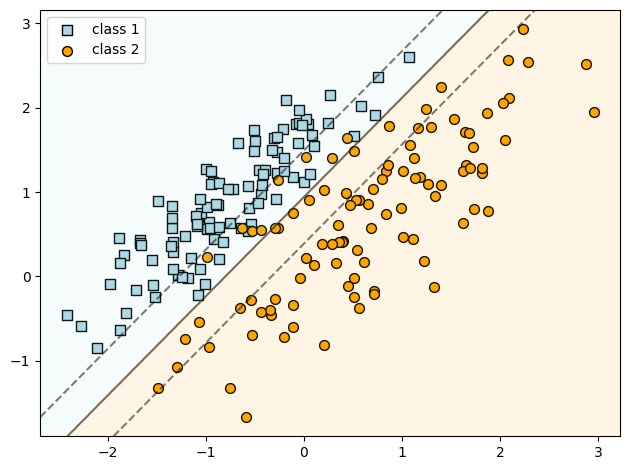

In [6]:
model = SVC(kernel="poly", 
            degree=search_baby.best_params_["degree"], 
            C=search_baby.best_params_["C"]).fit(features_ds3, labels_ds3)
train_score, test_score = evaluatePerformance(model, features_ds3, labels_ds3)        
print("Mean training accuracy: {:.2f}".format(train_score))
print("Mean test accuracy: {:.2f}".format(test_score))
plot_svc_decision_function(model, features_ds3, labels_ds3)

# Q3.3
Earth shatteringly boring results from the search. I had a lot of hope that I could find a polynomial boundary (`degree > 1`) between the two classes that could weave itself in better than linear (`degree = 1`). I think perhaps if I did instead look at better hyperparameter searching methods eg; a [bayesian search](https://scikit-optimize.github.io/stable/) or similar I could perform a more targetted search (like heuristicly moving towards hyper parameters based on what's working).

But at this stage, our finding suggests (based on a search restricted to just the "poly" kernel) that a flat out boring "linear" SVM with default regalurization performs best. Indeed a slight difference in $C$, but this when compared to above has neglible difference in performance.